In [8]:
import spikeinterface.widgets as sw
import spikeinterface.extractors as se
import numpy as np
import os
%matplotlib notebook

# Testing original functionality

In [9]:
# Generate test data
np.random.seed(1234)

nUnits = 8;
avgFiringRate = 10; # Hz
recordingLength = 60; # in seconds

# Generate spike times
numSpikes = np.random.poisson(avgFiringRate*nUnits);
spikeTimes = np.random.uniform(0,recordingLength,numSpikes);
spikeTimes.sort(); # .res format expects total spikes to be in order

# Generate indices of spikes from 1...nUnits + 1
spikeInds = np.random.randint(1,nUnits+1,numSpikes);

In [10]:
print(numSpikes)
print(spikeTimes)
print(spikeInds)

71
[ 0.40584372  0.82610698  2.59944376  2.84131673  3.23242111  3.58855337
  4.5228745   6.71365905  7.16285388  7.43656203  8.62600947 11.05722503
 11.74051072 13.12752634 16.35555632 16.58785531 17.1150576  19.01016733
 19.78010674 21.4690362  21.89315903 22.12944036 22.21504529 22.93904712
 23.83215466 26.17040543 26.26366434 26.52844532 27.0989045  28.29795206
 28.68562774 30.05970753 30.17800999 30.18498992 31.99860978 33.67177116
 33.6859848  33.95667858 34.08591916 35.23821801 35.6774868  36.43162237
 36.92377071 37.04650253 37.49500232 39.08268859 40.49285661 41.00777611
 42.25565827 42.27487849 42.76212162 44.31138337 46.3695973  46.79854849
 47.12151502 47.32380858 47.43144798 47.51784812 48.11233065 48.12885852
 52.14764337 52.55595808 52.95847144 54.55895754 54.72737319 55.49205772
 55.98840612 57.48836122 57.52810573 58.92028449 59.52488797]
[1 6 5 2 3 2 2 7 4 7 5 6 2 6 4 3 1 5 4 5 1 7 1 5 1 5 2 1 7 2 8 1 3 1 4 3 3
 8 4 7 3 2 8 5 1 2 2 3 3 8 6 5 4 3 5 6 6 2 1 1 6 4 8 5 1 

In [11]:
# Save test data
f1 = open("TestData.res","w+")
f2 = open("TestData.clu","w+")
f2.write("%d\n" % nUnits)
for j in range(numSpikes):
    f1.write("%d\n" % spikeTimes[j])
    f2.write("%d\n" % spikeInds[j])
    
f1.close() 
f2.close()

In [13]:
testNSE = se.NeuroscopeSortingExtractor('./TestData.res',
                                        './TestData.clu')

In [14]:
print('Units', testNSE.get_unit_ids())
for i in testNSE.get_unit_ids():
    print('Spike Times for unit', i, ': ', testNSE.get_unit_spike_train(i))
    
# Following the recent fix, this will now ignore cluster ID nUnits, since it expects it to range from 0,...,nUnits-1

Units [1, 2, 3, 4, 5, 6, 7]
Spike Times for unit 1 :  [ 0 17 21 22 23 26 30 30 37 48 48 54 55 57]
Spike Times for unit 2 :  [ 2  3  4 11 26 28 36 39 40 47 57]
Spike Times for unit 3 :  [ 3 16 30 33 33 35 41 42 46]
Spike Times for unit 4 :  [ 7 16 19 31 34 46 52 59]
Spike Times for unit 5 :  [ 2  8 19 21 22 26 37 44 47 54]
Spike Times for unit 6 :  [ 0 11 13 42 47 47 52 55]
Spike Times for unit 7 :  [ 6  7 22 27 35 58]


<IPython.core.display.Javascript object>


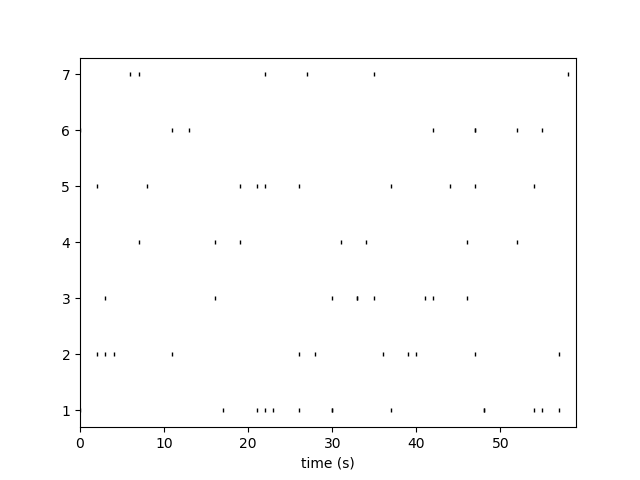

In [15]:
w_rs = sw.plot_rasters(testNSE,sampling_frequency=1) # This all works fine with the original functionality

# Testing new default functionality

In [ ]:
# Now, re-generate the data but force spikeInds to go from 0 to 7 instead of 1 to 8,
# which is the actual Neuroscope format.
#
# Additionally, the 0 index group consists of unsorted spikes
# while the 1 index group consists of multi-unit recordings as well...

# Generate test data
np.random.seed(1234)

nUnits = 8;
avgFiringRate = 10; # Hz
recordingLength = 60; # in seconds

# Generate spike times
numSpikes = np.random.poisson(avgFiringRate*nUnits);
spikeTimes = np.random.uniform(0,recordingLength,numSpikes);
spikeTimes.sort(); # .res format expects total spikes to be in order

# Generate indices of spikes
spikeInds = np.random.randint(0,nUnits,numSpikes);

In [ ]:
print(numSpikes)
print(spikeTimes)
print(spikeInds)

In [ ]:
# Save test data
f1 = open("TestData.res","w+")
f2 = open("TestData.clu","w+")
f2.write("%d\n" % nUnits)
for j in range(numSpikes):
    f1.write("%d\n" % spikeTimes[j])
    f2.write("%d\n" % spikeInds[j])
    
f1.close() 
f2.close()

In [ ]:
testNSE = se.NeuroscopeSortingExtractor('./TestData.res',
                                        './TestData.clu')

In [ ]:
print('Units', testNSE.get_unit_ids())
for i in testNSE.get_unit_ids():
    print('Spike Times for unit', i, ': ', testNSE.get_unit_spike_train(i))
    
# With the old issue, this final index will be mistakenly empty
# With the new fix, it will appropriately read IDs 1,...,nUnits-1, skipping 0

In [ ]:
w_rs = sw.plot_rasters(testNSE,sampling_frequency=1) # This all works fine

# Testing new additional option to return multi-unit activity

In [ ]:
testNSE = se.NeuroscopeSortingExtractor('./TestData.res',
                                        './TestData.clu',keep_mua_units=False)

os.remove('./TestData.res')
os.remove('./TestData.clu')

In [ ]:
print('Units', testNSE.get_unit_ids())
for i in testNSE.get_unit_ids():
    print('Spike Times for unit', i, ': ', testNSE.get_unit_spike_train(i))

With the new option, we will have only nUnits-2 total units, still starting from an index of 1

In [ ]:
w_rs = sw.plot_rasters(testNSE,sampling_frequency=1) # This all works fine